In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# this cell imports all of the datasets
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)
df_by_genres = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_genres.csv', index_col = 0)
df_by_year = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_year.csv', index_col = 0)
df_w_genres = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_w_genres.csv', index_col = 0)

In [3]:
df_main

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [9]:
# cleaning up df_main
df_main['artists'] = df_main['artists'].apply(lambda x: x[1:-1].split(', '))
df_main = df_main.explode('artists')
df_main['artists'] = df_main['artists'].apply(lambda x: x.strip("'"))
df_main_important_info =  df_main.loc[:,['artists','name','popularity','year']]
df_main_important_info

,artists,name,popularity,year
0,Carl Woitschach,Singende Bataillone 1. Teil,0,1928
1,Robert Schumann,"Fantasiestücke, Op. 111: Più tosto lento",0,1928
1,Vladimir Horowitz,"Fantasiestücke, Op. 111: Più tosto lento",0,1928
2,Seweryn Goszczyński,Chapter 1.18 - Zamek kaniowski,0,1928
3,Francisco Canaro,Bebamos Juntos - Instrumental (Remasterizado),0,1928
...,...,...,...,...
169906,Kygo,How Would I Know,70,2020
169906,Oh Wonder,How Would I Know,70,2020
169907,Cash Cash,I Found You,70,2020
169907,Andy Grammer,I Found You,70,2020


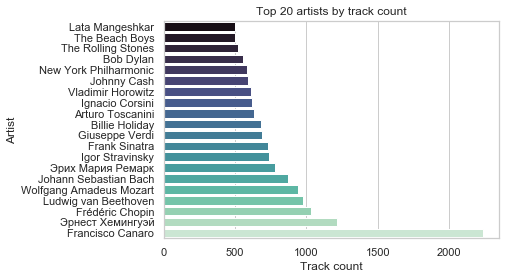

In [25]:
# this cell shows us the artists with the most songs
reindex_order = df_main_important_info['artists'].value_counts()[0:20].index[::-1]
total_songs = df_main_important_info['artists'].value_counts()[0:20].reindex(reindex_order)
total_pop = df_main_important_info.groupby(['artists']).sum()['popularity'].reindex(reindex_order)
df_active_artists = pd.DataFrame({('Artist'): total_songs.index, ('Song count'): total_songs.values, ('Artist popularity'): total_pop.values})

sns.set_theme(style = "whitegrid")
sns.set_context("notebook")
active_artists_fig = sns.barplot(x = 'Song count', y = 'Artist', palette = "mako", data = df_active_artists)
active_artists_fig.set_title("Top 20 artists by track count")
active_artists_fig.set_xlabel("Track count")
active_artists_fig.set_ylabel("Artist")
active_artists_fig

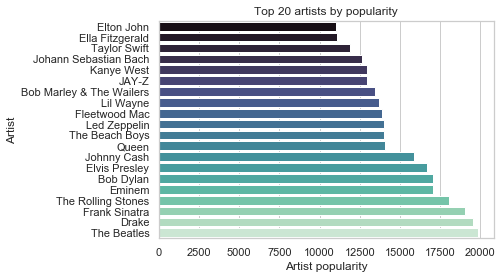

In [26]:
# this cell shows us the 20 most popular artists
reindex_order = df_main_important_info.groupby("artists")['popularity'].sum().sort_values(ascending = False)[0:20].index[::-1]
total_pop = df_main_important_info.groupby(['artists']).sum()['popularity'].sort_values(ascending = False)[0:20].reindex(reindex_order)
total_songs = df_main_important_info['artists'].value_counts().round(0).reindex(reindex_order)
df_popular_artists = pd.DataFrame({('Artist'): total_pop.index, ('Artist popularity'): total_pop.values, ('Song count'): total_songs.values})

sns.set_theme(style = "whitegrid")
sns.set_context("notebook")
popular_artists_fig = sns.barplot(x = 'Artist popularity', y = 'Artist', palette = "mako", data = df_popular_artists)
popular_artists_fig.set_title("Top 20 artists by popularity")
popular_artists_fig.set_xlabel("Artist popularity")
popular_artists_fig.set_ylabel("Artist")
popular_artists_fig

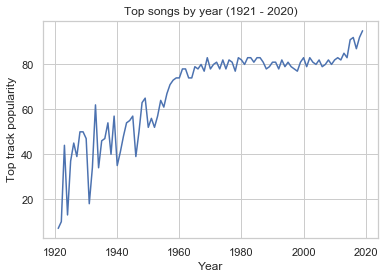

In [27]:
# this cell shows us the most popular song per year
popularity_by_year = df_main_important_info.sort_values('popularity', ascending = False).groupby('year').first()
popularity_by_year = popularity_by_year.reset_index()
popularity_by_year = popularity_by_year[['year', 'artists', 'name', 'popularity']]
reindex_order = popularity_by_year[0:99].index[::-1]
song_pop = popularity_by_year[0:99].reindex(reindex_order)
df_pop_songs = pd.DataFrame({('Year'): song_pop['year'].values, ("Top track popularity"): song_pop['popularity'].values, ('Artist'): song_pop['artists'].values, ('Track'): song_pop['name'].values})

sns.set_theme(style = "whitegrid")
sns.set_context("notebook")
pop_songs = sns.lineplot(x = 'Year', y = 'Top track popularity', palette = "mako", data = df_pop_songs)
pop_songs.set_title("Top songs by year (1921 - 2020)")
pop_songs.set_xlabel("Year")
pop_songs.set_ylabel("Top track popularity")
pop_songs

In [ ]:
# this cell shows us the top 20 artists from 2000 - 2020